<a href="https://colab.research.google.com/github/Amjadkp/DIGITAL-IMAGE-PROCESSING/blob/main/DIGITAL_set1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read an Image**

In [1]:
import cv2
img = cv2.imread('/content/192478-1920x1080-desktop-1080p-lionel-messi-wallpaper.jpg')  # Upload your image to Colab and replace with the filename


**Get the Image Information**

In [2]:
print("Shape (H, W, C):", img.shape)
print("Data type      :", img.dtype)
print("Size (bytes)   :", img.nbytes)


Shape (H, W, C): (1080, 1920, 3)
Data type      : uint8
Size (bytes)   : 6220800


**Find the Compression Ratio for the Copied Image**

In [3]:
# Save image as PNG (lossless) and JPG (lossy) and compare sizes
cv2.imwrite('copy.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
import os
original_size = os.path.getsize('/content/192478-1920x1080-desktop-1080p-lionel-messi-wallpaper.jpg')
compressed_size = os.path.getsize('copy.jpg')
compression_ratio = original_size / compressed_size
print("Compression ratio:", compression_ratio)


Compression ratio: 0.854484048709121


**Display the Negative of an Image**

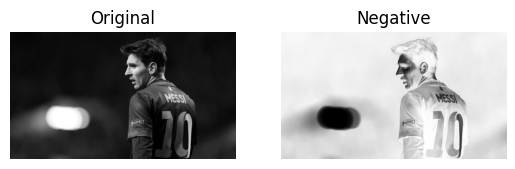

In [4]:
import matplotlib.pyplot as plt

img_gray = cv2.imread('/content/192478-1920x1080-desktop-1080p-lionel-messi-wallpaper.jpg', cv2.IMREAD_GRAYSCALE)
negative = 255 - img_gray

plt.subplot(1,2,1), plt.imshow(img_gray, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(negative, cmap='gray'), plt.title('Negative'), plt.axis('off')
plt.show()


**Histogram Plotting of an Image**

/tmp/ipython-input-1410234165.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,2); plt.hist(img.ravel(), 256, [0,256]); plt.title('Original Histogram')
/tmp/ipython-input-1410234165.py:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,4); plt.hist(equalized.ravel(), 256, [0,256]); plt.title('Equalized Histogram')


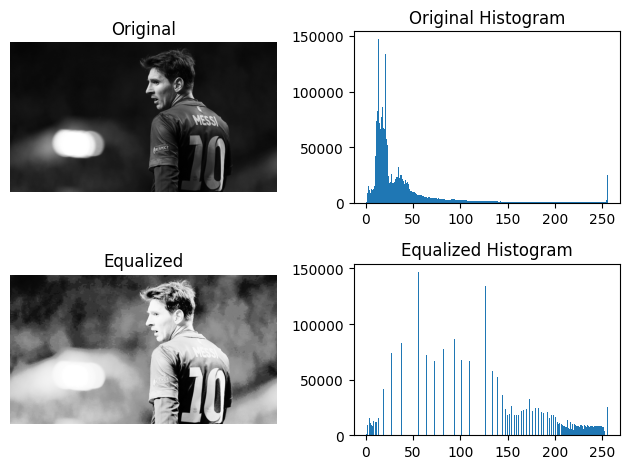

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/192478-1920x1080-desktop-1080p-lionel-messi-wallpaper.jpg', cv2.IMREAD_GRAYSCALE)
equalized = cv2.equalizeHist(img)

plt.subplot(2,2,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(2,2,2); plt.hist(img.ravel(), 256, [0,256]); plt.title('Original Histogram')
plt.subplot(2,2,3); plt.imshow(equalized, cmap='gray'); plt.title('Equalized'); plt.axis('off')
plt.subplot(2,2,4); plt.hist(equalized.ravel(), 256, [0,256]); plt.title('Equalized Histogram')
plt.tight_layout()
plt.show()


**Local Histogram Equalization (CLAHE)**

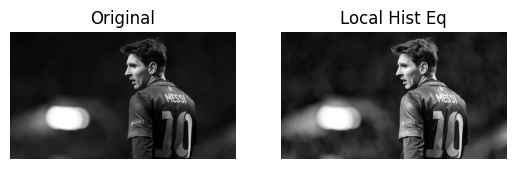

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/192478-1920x1080-desktop-1080p-lionel-messi-wallpaper.jpg', cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
local_eq = clahe.apply(img)

plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(local_eq, cmap='gray'); plt.title('Local Hist Eq'); plt.axis('off')
plt.show()


**5. Image Enhancement Operations**

**a. Brightness Enhancement**

In [7]:
img = cv2.imread('/content/192478-1920x1080-desktop-1080p-lionel-messi-wallpaper.jpg')
bright = cv2.convertScaleAbs(img, alpha=1, beta=50)  # Increase beta for more brightness


**b. Contrast Enhancement**

In [8]:
contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)  # Increase alpha for higher contrast


**c. Complement (Negative) of Image**

In [11]:
complement = 255 - img  # For grayscale or color


**d. Bi-level/Binary Contrast Enhancement**

In [10]:
import cv2
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)


**e. Brightness Slicing**

In [13]:
import numpy as np
slice_low, slice_high = 100, 200
brightness_sliced = np.where((gray >= slice_low) & (gray <= slice_high), 255, 0).astype(np.uint8)

**f. Low-pass Filtering**

In [16]:
lowpass = cv2.GaussianBlur(img, (5,5), 0)


**g. High-pass Filtering**

In [14]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])  # Sharpening filter example
highpass = cv2.filter2D(img, -1, kernel)


**Display Enhancement Results**

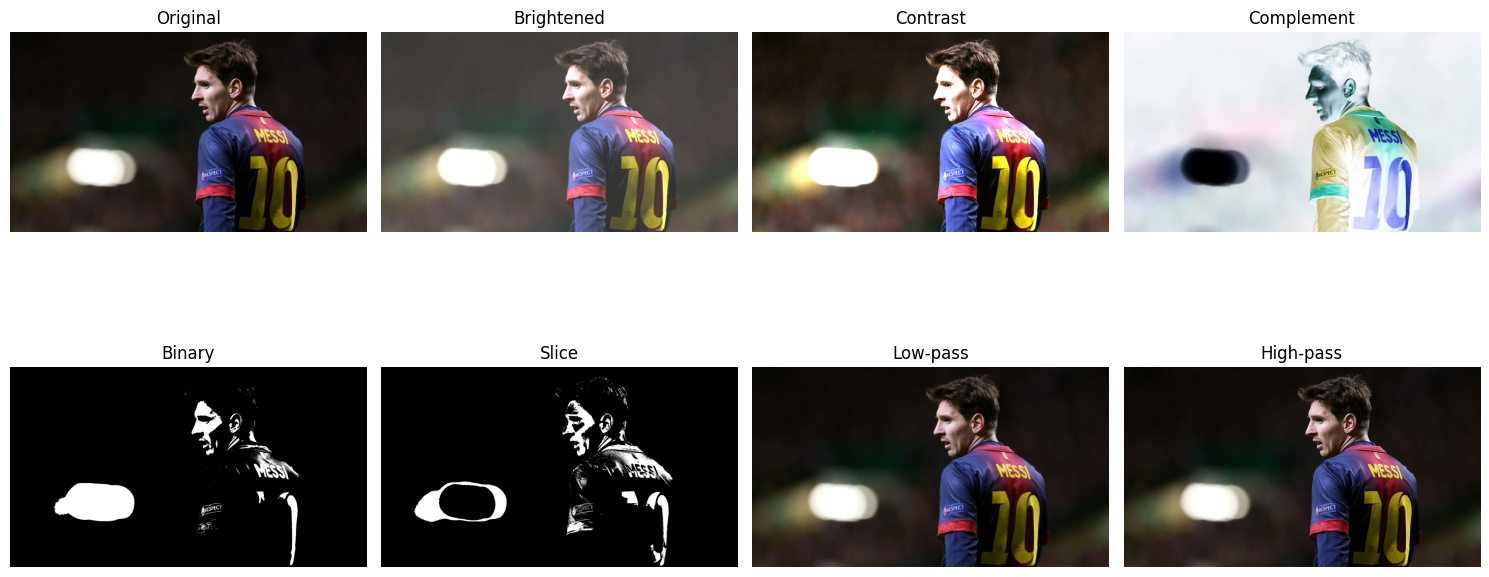

In [17]:
import matplotlib.pyplot as plt

titles = ['Original', 'Brightened', 'Contrast', 'Complement', 'Binary', 'Slice', 'Low-pass', 'High-pass']
images = [
    img, bright, contrast, complement,
    cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR),
    cv2.cvtColor(brightness_sliced, cv2.COLOR_GRAY2BGR),
    lowpass, highpass
]

plt.figure(figsize=(15,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


**6. Geometrical Transformations**
a. Translation
b. Rotation
c. Scaling
d. Skewing (Shearing)

In [18]:
rows, cols = img.shape[:2]
M = np.float32([[1, 0, 50], [0, 1, 100]])  # shift right by 50, down by 100
translated = cv2.warpAffine(img, M, (cols, rows))

M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # center, angle, scale
rotated = cv2.warpAffine(img, M, (cols, rows))

scaled = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# Simple horizontal shearing
M = np.float32([[1, 0.5, 0],
                [0,   1, 0]])
sheared = cv2.warpAffine(img, M, (int(cols*1.5), rows))


**Display Transformation Results**

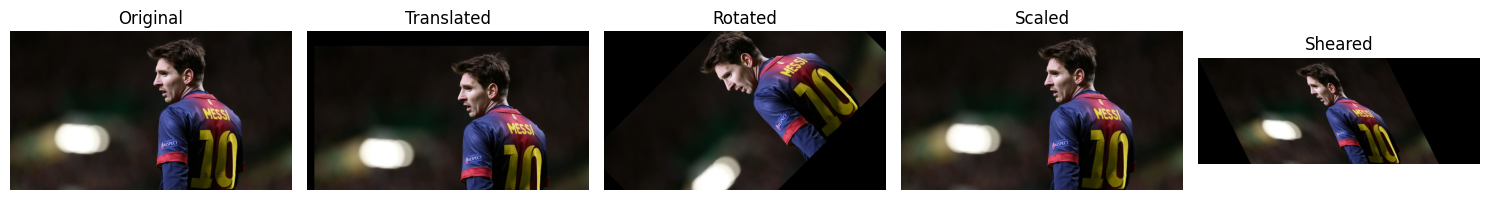

In [19]:
titles = ['Original', 'Translated', 'Rotated', 'Scaled', 'Sheared']
images = [img, translated, rotated, scaled, sheared]

plt.figure(figsize=(15,6))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
